In [18]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
from src.evaluation import Evaluator

In [19]:
paths=[]
for dataset in os.scandir('experiments'):
    if not dataset.is_dir() or not 'chembl' in dataset.name:
        continue

    if 'chemblAug5' in dataset.name:
        for setup in os.scandir(dataset):
            if '2hl_512hu' in setup.name and '256bs' in setup.name:
                paths.append(setup.path)

    elif 'chembl' in dataset.name:
        for setup in os.scandir(dataset):
            if '2hl_512hu' in setup.name and '512bs' in setup.name:
                paths.append(setup.path)

In [20]:
paths

['experiments/chemblAug5_SELFIES-RNN/2hl_512hu_256bs_0.001lr',
 'experiments/chemblAug5_SMILES-RNN/2hl_512hu_256bs_0.001lr',
 'experiments/chemblAug5_fragSMILES-RNN/2hl_512hu_256bs_300es_0.001lr',
 'experiments/chembl_SELFIES-RNN/2hl_512hu_512bs_0.001lr',
 'experiments/chembl_SMILES-RNN/2hl_512hu_512bs_0.001lr',
 'experiments/chembl_fragSMILES-RNN/2hl_512hu_512bs_300es_0.001lr',
 'experiments/chemblAug5_t-SMILES-RNN/2hl_512hu_256bs_0.001lr',
 'experiments/chembl_t-SMILES-RNN/2hl_512hu_512bs_0.001lr']

In [21]:
evaluators = [Evaluator(path) for path in paths]

In [22]:
evaluators_table = pd.concat([evaluator.get_as_DFcell() for evaluator in evaluators ], ignore_index=True, axis=0)

In [23]:
evaluators_table = evaluators_table.drop(columns=['dataset','notation']).groupby(['aug','hl','hu','bs','lr']).agg(lambda x: x.dropna())

In [24]:
evaluators_table

,,,,,SELFIES,SMILES,fragSMILES,t-SMILES
aug,hl,hu,bs,lr,,,,
1,2,512,512,0.001,<src.evaluation.Evaluator object at 0x7f926974...,<src.evaluation.Evaluator object at 0x7f92760e...,<src.evaluation.Evaluator object at 0x7f926950...,<src.evaluation.Evaluator object at 0x7f926950...
5,2,512,256,0.001,<src.evaluation.Evaluator object at 0x7f926974...,<src.evaluation.Evaluator object at 0x7f926974...,<src.evaluation.Evaluator object at 0x7f926948...,<src.evaluation.Evaluator object at 0x7f926950...


In [25]:
evaluators_table.map(lambda x: x.load_descriptors())

,,,,,SELFIES,SMILES,fragSMILES,t-SMILES
aug,hl,hu,bs,lr,,,,
1,2,512,512,0.001,True,True,True,False
5,2,512,256,0.001,True,True,True,False


/tmp/ipykernel_3503701/2106996424.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev.descriptors['SA'], hist=False, kde=True,
/home/tox/.local/lib/python3.11/site-packages/seaborn-0.13.2-py3.11.egg/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<AxesSubplot: xlabel='SA', ylabel='Density'>

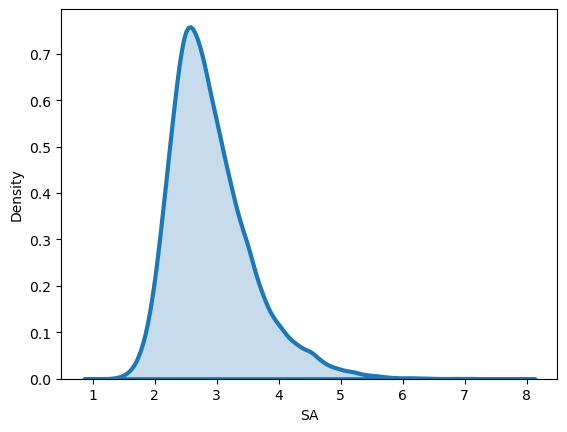

In [14]:
sns.distplot(ev.descriptors['SA'], hist=False, kde=True,
            kde_kws={'shade': True, 'linewidth': 3},
            # label='{0} ({1:0.2g})'.format(model, dist)
            )

AttributeError: Rectangle.set() got an unexpected keyword argument 'shade'

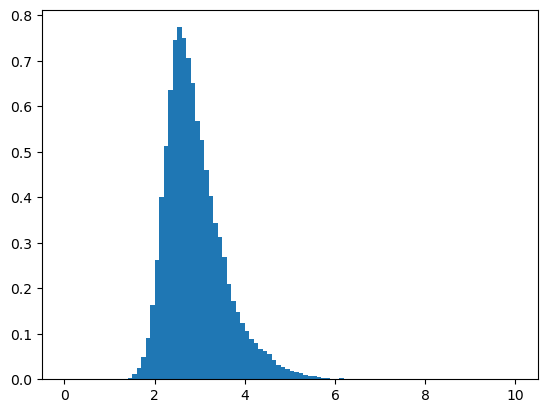

In [12]:
plt.hist(ev.descriptors['SA'], density=True, range=(0,10), bins = 100, shade=True)
plt.show()